In [30]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    classification_report,
)


In [2]:
# read data
data_df = pd.read_csv("./data/autism.csv")
data_df.head()


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,United States,no,6,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,Brazil,no,5,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,Spain,no,8,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,United States,no,6,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40,f,Other,no,Egypt,no,2,Other,NO


In [3]:
data_df.shape


(704, 19)

In [4]:
data_df.dtypes


A1_Score            int64
A2_Score            int64
A3_Score            int64
A4_Score            int64
A5_Score            int64
A6_Score            int64
A7_Score            int64
A8_Score            int64
A9_Score            int64
A10_Score           int64
age                object
gender             object
ethnicity          object
jundice            object
contry_of_res      object
used_app_before    object
result              int64
relation           object
Class/ASD          object
dtype: object

### Number of NULL values on the dataset

In [5]:
data_df.isna().sum()


A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
contry_of_res      0
used_app_before    0
result             0
relation           0
Class/ASD          0
dtype: int64

There is zero Null value in the given dataset.

### View the ethnicity column from the dataset

In [6]:
data_df["ethnicity"].value_counts()


ethnicity
White-European     233
Asian              123
Other               95
Middle Eastern      92
Black               43
South Asian         36
Others              30
Latino              20
Hispanic            13
Pasifika            12
Turkish              6
others               1
Name: count, dtype: int64

It consists of three values with name other so making them same value.
And view bar chart

In [7]:
data_df["ethnicity"] = data_df["ethnicity"].replace(
    ["Others", "others"], ["other", "other"]
)


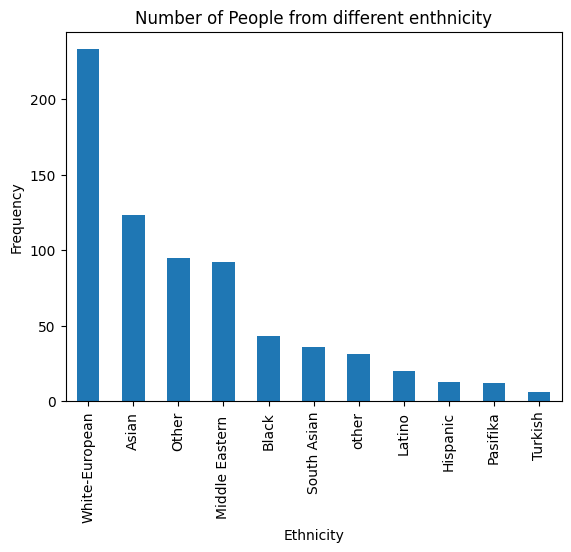

In [8]:
data_df["ethnicity"].value_counts().plot(kind="bar")
plt.xlabel("Ethnicity")
plt.ylabel("Frequency")
plt.title("Number of People from different enthnicity")
plt.show()


The dataset consists of more white-European where Turkish is less in number.

### Suffer from ASD

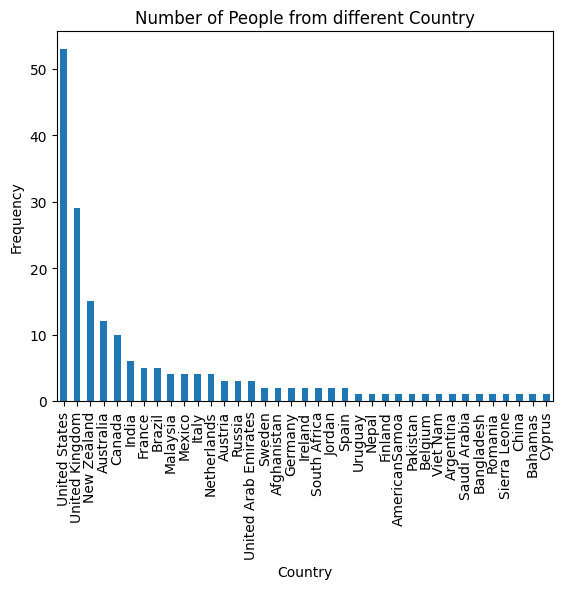

In [9]:
data_df[data_df["Class/ASD"] == "YES"]["contry_of_res"].value_counts().plot(kind="bar")
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.title("Number of People from different Country")
plt.show()


People form United States suffer from ASD more where Cyprus suffer less in the given dataset.

### Dataset Class

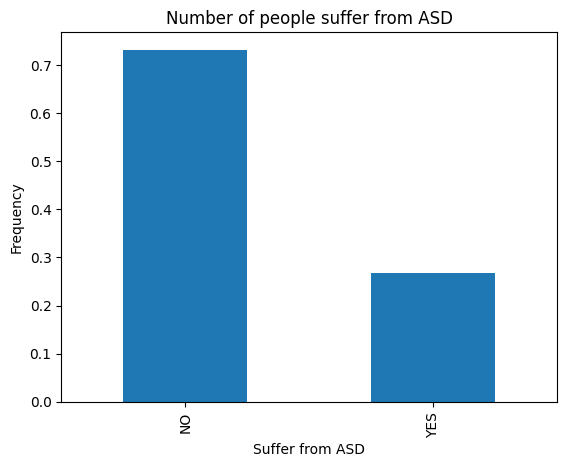

In [10]:
data_df["Class/ASD"].value_counts(normalize=True).plot(kind="bar")
plt.xlabel("Suffer from ASD")
plt.ylabel("Frequency")
plt.title("Number of people suffer from ASD")
plt.show()


Dataset contain people who are not suffer from ASD. 
About 72% of the data in the dataset is No and only about 28% of the data is Yes so the dataset is imbalanced data.

### Unknown Value

In [11]:
data_df["age"].unique()


array(['26', '24', '27', '35', '40', '36', '17', '64', '29', '33', '18',
       '31', '30', '34', '38', '42', '43', '48', '37', '55', '50', '53',
       '20', '28', '21', '383', '47', '32', '44', '?', '19', '58', '45',
       '22', '39', '25', '23', '54', '60', '41', '46', '56', '61', '59',
       '52', '49', '51'], dtype=object)

In [12]:
data_df[data_df == "?"].notna().sum()


A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jundice            0
contry_of_res      0
used_app_before    0
result             0
relation           0
Class/ASD          0
dtype: int64

Data consist of '?' in two rows so drop the two row which contains the unknown value

In [13]:
# define values
values = ["?"]

# drop rows that contain any value in the list
data_df = data_df[data_df.age.isin(values) == False]


Convert datatype of age column to int

In [14]:
data_df["age"] = data_df["age"].astype("int")


In [15]:
data_df["age"].unique()


array([ 26,  24,  27,  35,  40,  36,  17,  64,  29,  33,  18,  31,  30,
        34,  38,  42,  43,  48,  37,  55,  50,  53,  20,  28,  21, 383,
        47,  32,  44,  19,  58,  45,  22,  39,  25,  23,  54,  60,  41,
        46,  56,  61,  59,  52,  49,  51])

### Statistics

In [16]:
data_df.describe().loc[["mean", "std", "min", "max"]]


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
mean,0.723647,0.452991,0.458689,0.497151,0.498575,0.284900,0.417379,0.650997,0.324786,0.574074,29.698006,4.883191
std,0.447512,0.498140,0.498646,0.500348,0.500354,0.451689,0.493478,0.476995,0.468629,0.494835,16.507465,2.498051
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


A high standard deviation shows that the data is widely spread (less reliable) and a low standard deviation shows that the data are clustered closely around the mean. Age max value is 383 and mean is 29,so age column may contain outliers.

Skewness of dataset

In [17]:
data_df.skew(numeric_only=True)


A1_Score     -1.002366
A2_Score      0.189275
A3_Score      0.166164
A4_Score      0.011421
A5_Score      0.005710
A6_Score      0.955146
A7_Score      0.335809
A8_Score     -0.634928
A9_Score      0.749908
A10_Score    -0.300244
age          14.204194
result        0.326533
dtype: float64

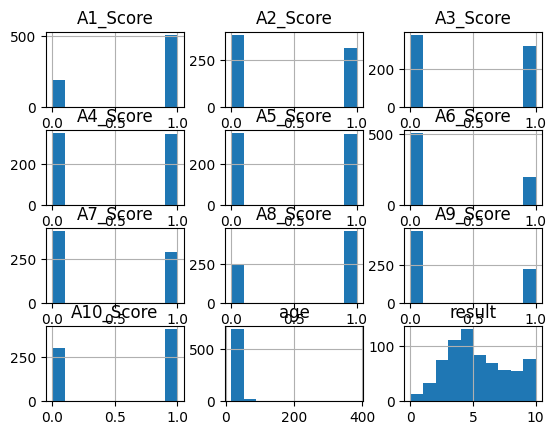

In [18]:
data_df.hist()
plt.show()


Columns like age and used app before are right skew. Where the result column skew value is near zero so it is near to Gaussian normal distribution.

### outlier
Use box plot to look for outliers in the dataset. By the statical data of the numeric column, we can say that the age column contains an outlier.

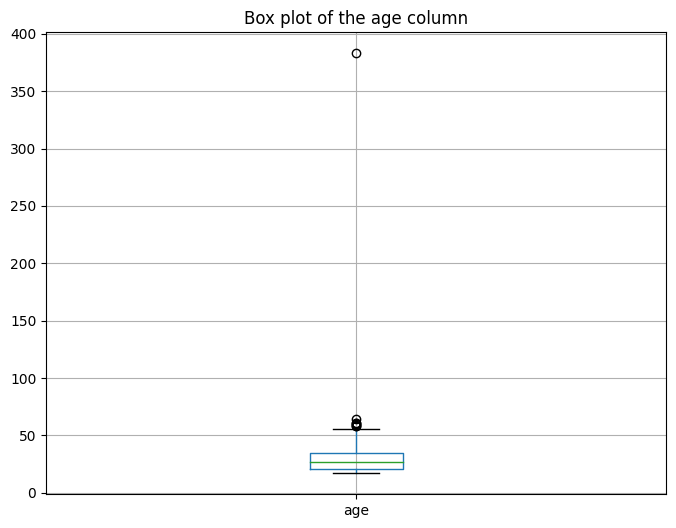

In [19]:
data_df.boxplot(column=["age"], figsize=(8, 6))
plt.title("Box plot of the age column")
plt.show()


The age column contains an outlier whose value is near 400. It is best to remove outlier row.

Remove outlier

In [20]:
data_df = data_df[data_df["age"] < 120]


Remove the row whose age is > 120 by the assumption that humans can't live more than 120 years old.

### Correlation

In [21]:
correlation = data_df.drop(columns=["Class/ASD"]).corr(numeric_only=True)


In [22]:
correlation


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
A1_Score,1.000000,0.012846,0.071103,0.124896,0.171300,0.108386,0.220363,0.143736,0.143604,0.119512,0.007109,0.396904
A2_Score,0.012846,1.000000,0.223835,0.158633,0.150301,0.185751,-0.045987,0.034212,0.205337,0.064825,0.082764,0.391116
A3_Score,0.071103,0.223835,1.000000,0.410430,0.264669,0.267080,0.077841,0.012498,0.313280,0.167253,0.098086,0.550793
A4_Score,0.124896,0.158633,0.410430,1.000000,0.306702,0.293346,0.151133,0.002862,0.325755,0.209858,0.107099,0.584446
A5_Score,0.171300,0.150301,0.264669,0.306702,1.000000,0.392633,0.235482,0.100776,0.396854,0.264251,0.009142,0.639485
A6_Score,0.108386,0.185751,0.267080,0.293346,0.392633,1.000000,0.175530,0.096923,0.478453,0.294092,0.091864,0.629932
A7_Score,0.220363,-0.045987,0.077841,0.151133,0.235482,0.175530,1.000000,0.084915,0.189549,0.248976,-0.001146,0.454183
A8_Score,0.143736,0.034212,0.012498,0.002862,0.100776,0.096923,0.084915,1.000000,0.098194,0.098582,-0.065932,0.319252
A9_Score,0.143604,0.205337,0.313280,0.325755,0.396854,0.478453,0.189549,0.098194,1.000000,0.282880,0.127949,0.661067
A10_Score,0.119512,0.064825,0.167253,0.209858,0.264251,0.294092,0.248976,0.098582,0.282880,1.000000,0.046628,0.535576


Correlation heatmap using matplotlib

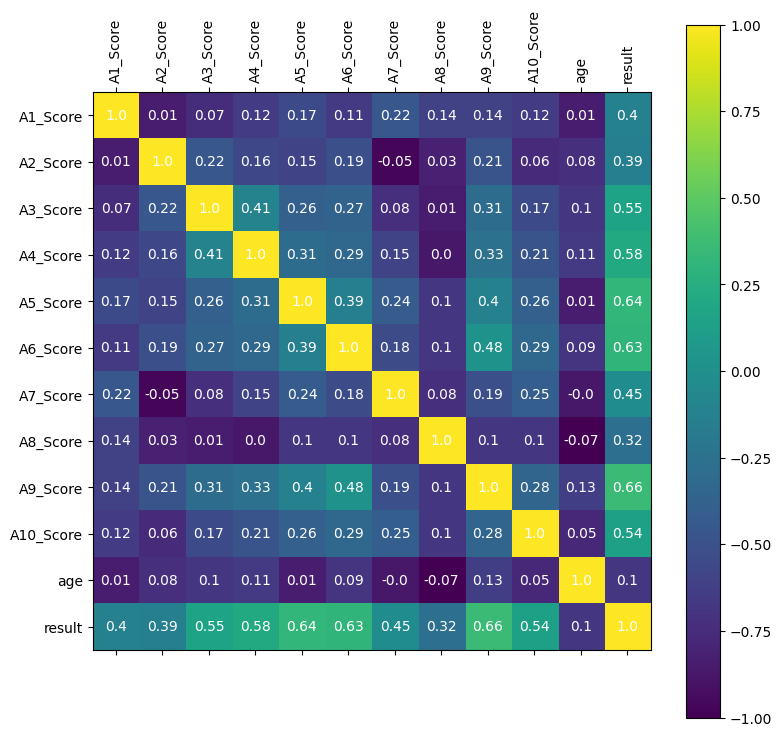

In [23]:
fig, ax = plt.subplots(figsize=(9, 9))
plot = ax.matshow(correlation, vmin=-1, vmax=1, cmap="viridis")
plt.colorbar(plot)
ticks = np.arange(0, len(correlation.columns), 1)
names = correlation.columns
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)

plt.setp(ax.get_xticklabels(), rotation=90)
im = ax.imshow(correlation.round(decimals=2).values)
# Loop over data dimensions and create text annotations.
for i in range(len(correlation.columns)):
    for j in range(len(correlation.columns)):
        text = ax.text(
            j,
            i,
            correlation.round(decimals=2).values[i, j],
            ha="center",
            va="center",
            color="w",
        )
plt.show()


Correlation heatmap using seaborn

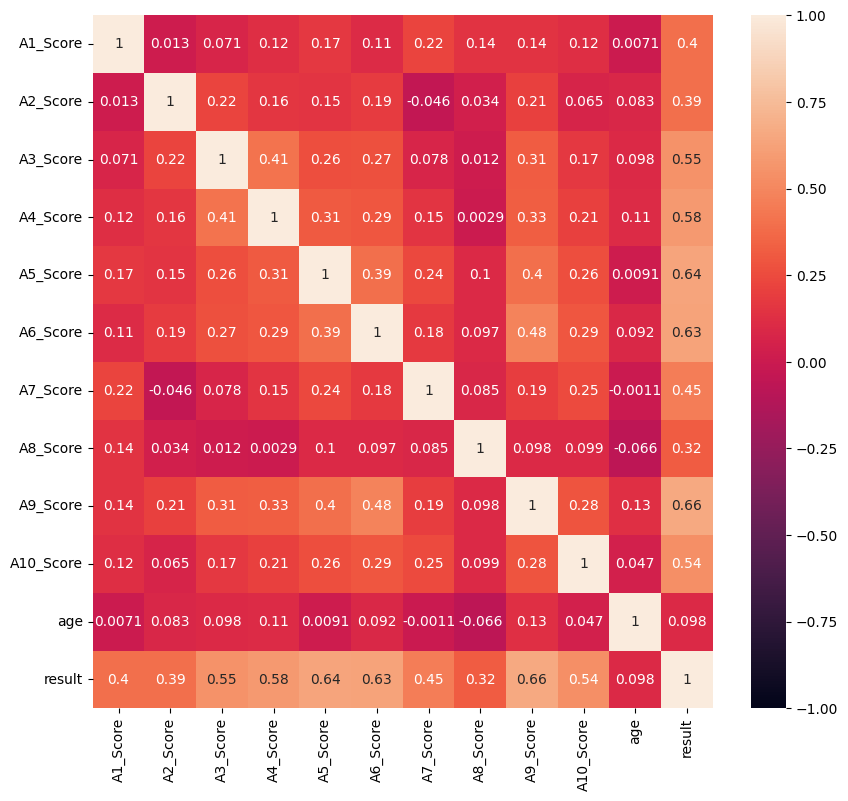

In [24]:
fig, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, ax=ax)
plt.show()


Column results show a correlation of more than 0.5 for many Score columns. But Some Score column shows less correlation which is not near 0. So we can say that the Score columns are used to calculate the result column.

### categorical
Making categorical data as category datatype

In [25]:
for column in data_df.columns:
    if data_df[column].nunique() < 5:
        data_df[column] = data_df[column].astype("category")


making column datatype as a category when the column has less than 5 unique values.

In [26]:
data_df.dtypes


A1_Score           category
A2_Score           category
A3_Score           category
A4_Score           category
A5_Score           category
A6_Score           category
A7_Score           category
A8_Score           category
A9_Score           category
A10_Score          category
age                   int32
gender             category
ethnicity            object
jundice            category
contry_of_res        object
used_app_before    category
result                int64
relation             object
Class/ASD          category
dtype: object

In [27]:
data_df.shape


(701, 19)

### Encoding

Encodeing category data

In [31]:
label_encoder = LabelEncoder()
columns = ["jundice", "used_app_before", "Class/ASD"]
# Encode labels categoty column.
for column in columns:
    data_df[column] = label_encoder.fit_transform(data_df[column])

data_df.head()


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,0,United States,0,6,Self,0
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,0,Brazil,0,5,Self,0
2,1,1,0,1,1,0,1,1,1,1,27,m,Latino,1,Spain,0,8,Parent,1
3,1,1,0,1,0,0,1,1,0,1,35,f,White-European,0,United States,0,6,Self,0
4,1,0,0,0,0,0,0,1,0,0,40,f,Other,0,Egypt,0,2,Other,0


Use One Hot Encoder on the gender column.

In [32]:
one_Hot_Encoder = OneHotEncoder()
X = one_Hot_Encoder.fit_transform(data_df.gender.values.reshape(-1, 1)).toarray()
dfOneHot = pd.DataFrame(
    X,
    columns=["gender_" + i for i in data_df["gender"].unique()],
    index=data_df.index.to_numpy(dtype=int),
).astype("int")
# add value come from OneHotEncoder to a data frame
data_df = pd.concat([data_df, dfOneHot], axis=1)
# data frame also contains gender so drop that column.
data_df = data_df.drop(["gender"], axis=1)


In [33]:
data_df.head()


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,ethnicity,jundice,contry_of_res,used_app_before,result,relation,Class/ASD,gender_f,gender_m
0,1,1,1,1,0,0,1,1,0,0,26,White-European,0,United States,0,6,Self,0,1,0
1,1,1,0,1,0,0,0,1,0,1,24,Latino,0,Brazil,0,5,Self,0,0,1
2,1,1,0,1,1,0,1,1,1,1,27,Latino,1,Spain,0,8,Parent,1,0,1
3,1,1,0,1,0,0,1,1,0,1,35,White-European,0,United States,0,6,Self,0,1,0
4,1,0,0,0,0,0,0,1,0,0,40,Other,0,Egypt,0,2,Other,0,1,0


In [34]:
data_df["gender_f"].corr(data_df["gender_m"])


-1.0

Use Label encoder on the country column.

In [35]:
data_df["contry_of_res"].value_counts()


contry_of_res
United States           113
United Arab Emirates     82
India                    81
New Zealand              80
United Kingdom           77
                       ... 
China                     1
Chile                     1
Lebanon                   1
Burundi                   1
Cyprus                    1
Name: count, Length: 67, dtype: int64

In [36]:
data_df["contry_of_res"] = label_encoder.fit_transform(data_df["contry_of_res"])


In [37]:
data_df["contry_of_res"].value_counts()


contry_of_res
64    113
62     82
29     81
43     80
63     77
     ... 
17      1
16      1
38      1
14      1
19      1
Name: count, Length: 67, dtype: int64

### Normalization
normalization country and age column in the range of (0,1)

In [38]:
data_df.head()


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,ethnicity,jundice,contry_of_res,used_app_before,result,relation,Class/ASD,gender_f,gender_m
0,1,1,1,1,0,0,1,1,0,0,26,White-European,0,64,0,6,Self,0,1,0
1,1,1,0,1,0,0,0,1,0,1,24,Latino,0,13,0,5,Self,0,0,1
2,1,1,0,1,1,0,1,1,1,1,27,Latino,1,56,0,8,Parent,1,0,1
3,1,1,0,1,0,0,1,1,0,1,35,White-European,0,64,0,6,Self,0,1,0
4,1,0,0,0,0,0,0,1,0,0,40,Other,0,22,0,2,Other,0,1,0


In [39]:
column_to_normalize = ["contry_of_res", "age"]
normalization = MinMaxScaler()
normalize_array = normalization.fit_transform(data_df[column_to_normalize])
normalize_df = pd.DataFrame(
    normalize_array,
    columns=column_to_normalize,
    index=data_df.index.to_numpy(dtype=int),
)
data_df = pd.concat([data_df.drop(columns=column_to_normalize), normalize_df], axis=1)
data_df.head()


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,ethnicity,jundice,used_app_before,result,relation,Class/ASD,gender_f,gender_m,contry_of_res,age
0,1,1,1,1,0,0,1,1,0,0,White-European,0,0,6,Self,0,1,0,0.969697,0.191489
1,1,1,0,1,0,0,0,1,0,1,Latino,0,0,5,Self,0,0,1,0.196970,0.148936
2,1,1,0,1,1,0,1,1,1,1,Latino,1,0,8,Parent,1,0,1,0.848485,0.212766
3,1,1,0,1,0,0,1,1,0,1,White-European,0,0,6,Self,0,1,0,0.969697,0.382979
4,1,0,0,0,0,0,0,1,0,0,Other,0,0,2,Other,0,1,0,0.333333,0.489362


The country column consists of 68 unique country names and while using label encoding some country is superior to other so Normalization is done in the country column.
Due to a similar reason for the age column, we use Normalization.

### Drop column
Drop column which will not be used as a feature for the model.

In [40]:
drop_column = ["ethnicity", "used_app_before", "relation", "result"]
data_df.drop(columns=drop_column, inplace=True)
data_df.head()


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,jundice,Class/ASD,gender_f,gender_m,contry_of_res,age
0,1,1,1,1,0,0,1,1,0,0,0,0,1,0,0.969697,0.191489
1,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0.196970,0.148936
2,1,1,0,1,1,0,1,1,1,1,1,1,0,1,0.848485,0.212766
3,1,1,0,1,0,0,1,1,0,1,0,0,1,0,0.969697,0.382979
4,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0.333333,0.489362


In [41]:
data_df.dtypes


A1_Score         category
A2_Score         category
A3_Score         category
A4_Score         category
A5_Score         category
A6_Score         category
A7_Score         category
A8_Score         category
A9_Score         category
A10_Score        category
jundice             int32
Class/ASD           int32
gender_f            int32
gender_m            int32
contry_of_res     float64
age               float64
dtype: object

In [42]:
data_df.shape


(701, 16)

### train test split
Separate feature to X and target column to y variable.

In [43]:
target_column = "Class/ASD"
X = data_df.drop(columns=target_column)
y = data_df[target_column]


In [44]:
y.info()


<class 'pandas.core.series.Series'>
Index: 701 entries, 0 to 703
Series name: Class/ASD
Non-Null Count  Dtype
--------------  -----
701 non-null    int32
dtypes: int32(1)
memory usage: 8.2 KB


Split train and test data (80:20)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=146, stratify=y
)


The given dataset is an imbalance where about 72% of the data in the dataset class is No and only about 28% of the data is Yes. So to maintain the data imbalance for train and test we use stratify where while splitting data it will maintain a 72:28 ratio of No and Yes for both train and test data.

### Model
Model is train using logistic regression

### CSV to DataFrame
Read CSV Data to DataFrame

In [46]:
def read_data(path):
    """_summary_

    Parameters
    ----------
    path : str
        location of CSV file.

    Returns
    -------
    DataFrame
        CSV file convert to DataFrame
    """
    return pd.read_csv(path)


### Function for preprocessing data

In [51]:
def data_pre_processing(df):
    """_summary_

    Parameters
    ----------
    df : DataFrame
        DataFrame from autism dataset

    Returns
    -------
    DataFrame
        return pre precessing dataframe of input dataframe
    """

    # drop rows that contain any value in the list
    if df["age"].dtype == "object":
        # define values
        values = ["?"]
        df = df[df.age.isin(values) == False]

        # Convert datatype of age column to int
        df["age"] = df["age"].astype("int")

    # Remove outlier rows
    df = df[df["age"] < 120]

    # Making categorical data as category datatype
    for column in df.columns:
        if df[column].nunique() < 5:
            df[column] = df[column].astype("category")

    # Encoding
    # using label encoding for some column
    label_encoder = LabelEncoder()
    label_encoding_columns = [
        "jundice",
        "used_app_before",
        "Class/ASD",
        "contry_of_res",
    ]
    # Encode labels categoty column.
    for column in label_encoding_columns:
        df[column] = label_encoder.fit_transform(df[column])

    # one hot encoder for gender column
    one_Hot_Encoder = OneHotEncoder()
    X = one_Hot_Encoder.fit_transform(df.gender.values.reshape(-1, 1)).toarray()
    dfOneHot = pd.DataFrame(
        X,
        columns=["gender_" + i for i in df["gender"].unique()],
        index=df.index.to_numpy(dtype=int),
    ).astype("int")
    # add value come from OneHotEncoder to a data frame
    df = pd.concat([df, dfOneHot], axis=1)
    # data frame also contains gender so drop that column.
    df = df.drop(["gender"], axis=1)

    # normaliz country and age column
    column_to_normalize = ["contry_of_res", "age"]
    normalization = MinMaxScaler()
    normalize_array = normalization.fit_transform(df[column_to_normalize])
    normalize_df = pd.DataFrame(
        normalize_array, columns=column_to_normalize, index=df.index.to_numpy(dtype=int)
    )
    df = pd.concat([df.drop(columns=column_to_normalize), normalize_df], axis=1)

    # drop personal information column and multicollinearity column
    drop_column = ["ethnicity", "used_app_before", "relation", "result"]
    df.drop(columns=drop_column, inplace=True)

    # return DataFrame
    return df


Train test split

In [52]:
def split(df, target_column):
    """_summary_

    Parameters
    ----------
    df : DataFrame
        data frame to split into train test data
    target_column : str
        target column name

    Returns
    -------
    DataFrame, Series, DataFrame, Series
        train and test data
    """
    X = df.drop(columns=target_column)
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=146, stratify=y
    )
    return X_train, X_test, y_train, y_test


In [53]:
df = pd.read_csv(
    "E:\\TAI\\intern lab\\week 2\\ai-ml-interns\\2_ML_algo\\data\\autism.csv"
)
df.head()


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,United States,no,6,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,Brazil,no,5,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,Spain,no,8,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,United States,no,6,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40,f,Other,no,Egypt,no,2,Other,NO


In [54]:
df = data_pre_processing(df)
df.head()


C:\Users\Anish\AppData\Local\Temp\ipykernel_15988\2435370728.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].astype('int')


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,jundice,Class/ASD,gender_f,gender_m,contry_of_res,age
0,1,1,1,1,0,0,1,1,0,0,0,0,1,0,0.969697,0.191489
1,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0.196970,0.148936
2,1,1,0,1,1,0,1,1,1,1,1,1,0,1,0.848485,0.212766
3,1,1,0,1,0,0,1,1,0,1,0,0,1,0,0.969697,0.382979
4,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0.333333,0.489362


In [55]:
X_train, X_test, y_train, y_test = split(df, "Class/ASD")


In [56]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

Predict train data

In [57]:
y_train_pred = model.predict(X_train)


In [58]:
ConfusionMatrix = confusion_matrix(y_train, y_train_pred)


<Axes: >

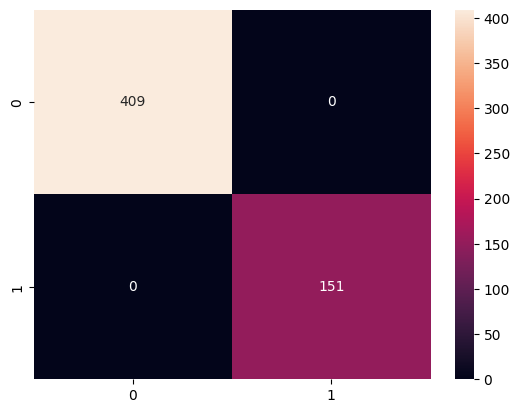

In [59]:
sns.heatmap(ConfusionMatrix, annot=True, fmt=".3g")


In [60]:
print(classification_report(y_train, y_train_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       1.00      1.00      1.00       151

    accuracy                           1.00       560
   macro avg       1.00      1.00      1.00       560
weighted avg       1.00      1.00      1.00       560



Accuracy of the model is 100% for training data, where precision 1 which indicate 0 false positive and recall is 1 which indicate 0 false negative.

Predict test data

In [61]:
y_test_pred = model.predict(X_test)


Get confusion matrix

In [62]:
ConfusionMatrix = confusion_matrix(y_test, y_test_pred)


Confusion Matrix

<Axes: >

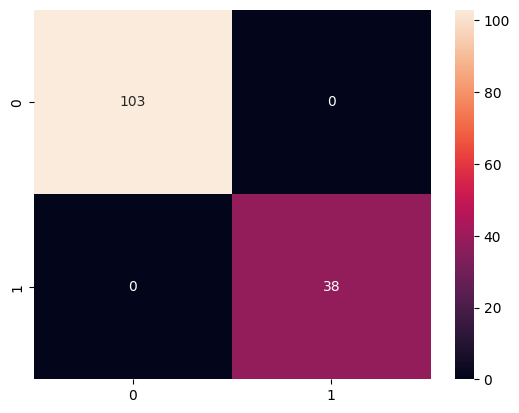

In [63]:
sns.heatmap(ConfusionMatrix, annot=True, fmt=".3g")


Confusion Matrix show there is no FP and FN prediction from the given model. So accuracy of the model is 100%.

In [64]:
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00        38

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141



Accuracy of the model is 100%, where precision 1 which indicate 0 false positive and recall is 1 which indicate 0 false negative.